## Analyze Australia Car Market Data
Data From : https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data

## Import Library and Load the Data

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [414]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

In [415]:
data = pd.read_csv('Australian_Vehicle_Prices.csv')
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,"2,022.00",Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,"2,022.00",MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,"2,022.00",430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,"2,011.00",E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,"2,022.00",Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


## Preliminary Data Exploration

In [417]:
data.shape

(16734, 19)

In [418]:
data.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [419]:
data.count()

Brand                16733
Year                 16733
Model                16733
Car/Suv              16706
Title                16733
UsedOrNew            16733
Transmission         16733
Engine               16733
DriveType            16733
FuelType             16733
FuelConsumption      16733
Kilometres           16733
ColourExtInt         16733
Location             16284
CylindersinEngine    16733
BodyType             16452
Doors                15130
Seats                15029
Price                16731
dtype: int64

In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

## Data Cleaning

In [422]:
clean_data = data.copy()

In [423]:
clean_data['Year'] = pd.to_numeric(clean_data['Year'], errors='coerce')
clean_data['Price'] = pd.to_numeric(clean_data['Price'], errors='coerce')
clean_data['Kilometres'] = pd.to_numeric(clean_data['Kilometres'], errors='coerce')
clean_data['FuelConsumption'] = pd.to_numeric(clean_data['FuelConsumption'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce') 

In [424]:
print(f'Any NaN values? {clean_data.isna().values.any()}')

Any NaN values? True


In [425]:
print(f'Any duplicates? {clean_data.duplicated().values.any()}')

Any duplicates? False


In [426]:
clean_data = clean_data.dropna()
print(f'Any NaN values? {clean_data.isna().values.any()}')

Any NaN values? False


In [427]:
columns_to_convert = ['Year', 'Kilometres', 'Price']

clean_data[columns_to_convert] = clean_data[columns_to_convert].apply(lambda x: x.astype(int))

In [428]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14454 non-null  object 
 1   Year               14454 non-null  int32  
 2   Model              14454 non-null  object 
 3   Car/Suv            14454 non-null  object 
 4   Title              14454 non-null  object 
 5   UsedOrNew          14454 non-null  object 
 6   Transmission       14454 non-null  object 
 7   Engine             14454 non-null  object 
 8   DriveType          14454 non-null  object 
 9   FuelType           14454 non-null  object 
 10  FuelConsumption    14454 non-null  float64
 11  Kilometres         14454 non-null  int32  
 12  ColourExtInt       14454 non-null  object 
 13  Location           14454 non-null  object 
 14  CylindersinEngine  14454 non-null  object 
 15  BodyType           14454 non-null  object 
 16  Doors              14454 no

In [429]:
clean_data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.70,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.70,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.60,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.00,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.00,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [430]:
clean_data.describe()

,Year,FuelConsumption,Kilometres,Price
count,"14,454.00","14,454.00","14,454.00","14,454.00"
mean,"2,016.19",7.74,"100,096.71","34,892.53"
std,4.91,2.21,"78,140.37","29,051.93"
min,"1,978.00",0.00,1.00,88.00
25%,"2,013.00",6.60,"41,074.00","18,990.00"
50%,"2,017.00",7.60,"85,052.00","28,990.00"
75%,"2,020.00",8.80,"146,705.50","42,288.00"
max,"2,023.00",27.00,"526,162.00","649,880.00"


In [431]:
clean_data.nunique()

Brand                   64
Year                    39
Model                  646
Car/Suv                228
Title                 7074
UsedOrNew                3
Transmission             3
Engine                  91
DriveType                5
FuelType                 8
FuelConsumption        152
Kilometres           12970
ColourExtInt           706
Location               593
CylindersinEngine        9
BodyType                10
Doors                    4
Seats                   12
Price                 3172
dtype: int64

## The Most Popular Brand in Australia

In [433]:
brand_summary = clean_data.groupby('Brand').agg(Count=('Brand','size'), 
                                                AveragePrice=('Price', 'mean'), 
                                                MinPrice=('Price', 'min'),
                                                MaxPrice=('Price', 'max')).reset_index()
print(brand_summary)

         Brand  Count  AveragePrice  MinPrice  MaxPrice
0       Abarth      2     37,490.00     36990     37990
1         Alfa     13     25,319.00        88     91990
2        Aston      3    194,663.00     94999    369000
3         Audi    432     51,855.62      2999    436900
4          BMW    402     48,177.40      3999    299990
..         ...    ...           ...       ...       ...
59        Tata      1     16,990.00     16990     16990
60       Tesla     13     89,528.23     56950    165900
61      Toyota   2259     39,376.25      2500    299900
62  Volkswagen    772     35,833.38      5840    145044
63       Volvo    105     41,528.04      4990    124990

[64 rows x 5 columns]


In [434]:
brand_summary.sort_values('Count', ascending=False).head()

,Brand,Count,AveragePrice,MinPrice,MaxPrice
61,Toyota,2259,"39,376.25",2500,299900
26,Hyundai,1142,"25,831.25",2995,109990
40,Mazda,1050,"28,982.29",1200,82888
24,Holden,1024,"21,215.42",2999,148880
17,Ford,968,"31,794.02",2500,121990


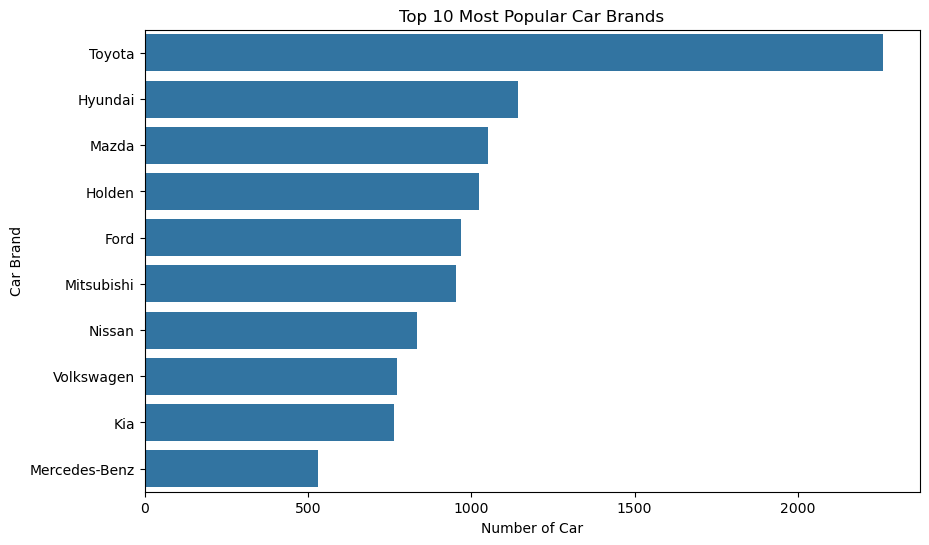

In [435]:
sorted_brand_summary = brand_summary.sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sorted_brand_summary['Count'][:10], y=sorted_brand_summary['Brand'][:10])
plt.xlabel('Number of Car')
plt.ylabel('Car Brand')
plt.title('Top 10 Most Popular Car Brands')
plt.show()

## The Most Popular Car Model in Australia

In [437]:
model_summary = clean_data.groupby(['Model','Brand']).agg(Count=('Model','size'), 
                                                AveragePrice=('Price', 'mean'), 
                                                MinPrice=('Price', 'min'),
                                                MaxPrice=('Price', 'max')).reset_index()
model_summary.head()

,Model,Brand,Count,AveragePrice,MinPrice,MaxPrice
0,116I,BMW,3,"16,298.00",14900,16999
1,118D,BMW,5,"20,133.40",13999,27990
2,118I,BMW,17,"33,144.35",16990,57988
3,120D,BMW,1,"9,900.00",9900,9900
4,120I,BMW,1,"33,990.00",33990,33990


In [438]:
model_summary['BrandModel'] = model_summary['Brand'] + ' ' + model_summary['Model']

In [439]:
model_summary.sort_values('Count', ascending=False).head()

,Model,Brand,Count,AveragePrice,MinPrice,MaxPrice,BrandModel
352,Hilux,Toyota,407,"38,261.66",4750,84999,Toyota Hilux
524,Ranger,Ford,372,"39,757.44",8990,121990,Ford Ranger
402,Landcruiser,Toyota,361,"68,453.51",9990,299900,Toyota Landcruiser
208,Corolla,Toyota,356,"26,276.04",2995,57344,Toyota Corolla
356,I30,Hyundai,350,"24,023.90",2999,66990,Hyundai I30


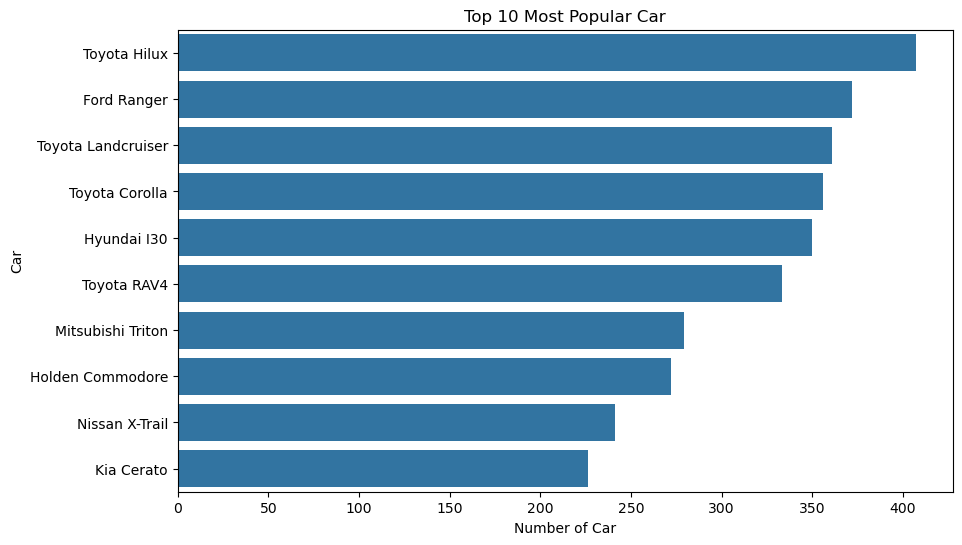

In [440]:
sorted_model_summary = model_summary.sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sorted_model_summary['Count'][:10], y=sorted_model_summary['BrandModel'][:10])
plt.xlabel('Number of Car')
plt.ylabel('Car')
plt.title('Top 10 Most Popular Car')
plt.show()

## Model to Predict the Car Price
Features : Brand, Year, UsedOrNew, Transmission, FuelConsumption, Kilometres

Target : Price

In [442]:
model_data = clean_data.copy()
model_data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.70,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.70,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.60,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.00,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.00,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [443]:
model_data = model_data.drop(['Model', 'Car/Suv', 'Title', 'Engine', 'DriveType', 'FuelType', 'ColourExtInt', 
                              'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats'], axis=1)
model_data.head()

,Brand,Year,UsedOrNew,Transmission,FuelConsumption,Kilometres,Price
0,Ssangyong,2022,DEMO,Automatic,8.70,5595,51990
1,MG,2022,USED,Automatic,6.70,16,19990
2,BMW,2022,USED,Automatic,6.60,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,11.00,136517,32990
4,Renault,2022,USED,Automatic,6.00,1035,34990


In [444]:
model_data.count()

Brand              14454
Year               14454
UsedOrNew          14454
Transmission       14454
FuelConsumption    14454
Kilometres         14454
Price              14454
dtype: int64

In [445]:
model_data.nunique()

Brand                 64
Year                  39
UsedOrNew              3
Transmission           3
FuelConsumption      152
Kilometres         12970
Price               3172
dtype: int64

In [446]:
# Remove value 'DEMO' from UsedOrNew Column
model_data = model_data[model_data['UsedOrNew'] != 'DEMO']
model_data.head()

,Brand,Year,UsedOrNew,Transmission,FuelConsumption,Kilometres,Price
1,MG,2022,USED,Automatic,6.70,16,19990
2,BMW,2022,USED,Automatic,6.60,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,11.00,136517,32990
4,Renault,2022,USED,Automatic,6.00,1035,34990
6,Land,2017,USED,Automatic,5.10,67662,62280


In [447]:
# Drop '-' values from the data
model_data = model_data.replace('-', pd.NA).dropna()
model_data.head()

,Brand,Year,UsedOrNew,Transmission,FuelConsumption,Kilometres,Price
1,MG,2022,USED,Automatic,6.70,16,19990
2,BMW,2022,USED,Automatic,6.60,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,11.00,136517,32990
4,Renault,2022,USED,Automatic,6.00,1035,34990
6,Land,2017,USED,Automatic,5.10,67662,62280


In [448]:
model_data['UsedOrNew'] = model_data['UsedOrNew'].replace({'USED': 0, 'NEW': 1}).astype(int)
model_data['Transmission'] = model_data['Transmission'].replace({'Automatic': 0, 'Manual': 1}).astype(int)
model_data.head()

,Brand,Year,UsedOrNew,Transmission,FuelConsumption,Kilometres,Price
1,MG,2022,0,0,6.70,16,19990
2,BMW,2022,0,0,6.60,8472,108988
3,Mercedes-Benz,2011,0,0,11.00,136517,32990
4,Renault,2022,0,0,6.00,1035,34990
6,Land,2017,0,0,5.10,67662,62280


In [449]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14008 entries, 1 to 16733
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            14008 non-null  object 
 1   Year             14008 non-null  int32  
 2   UsedOrNew        14008 non-null  int32  
 3   Transmission     14008 non-null  int32  
 4   FuelConsumption  14008 non-null  float64
 5   Kilometres       14008 non-null  int32  
 6   Price            14008 non-null  int32  
dtypes: float64(1), int32(5), object(1)
memory usage: 601.9+ KB


In [450]:
model_data.describe()

,Year,UsedOrNew,Transmission,FuelConsumption,Kilometres,Price
count,"14,008.00","14,008.00","14,008.00","14,008.00","14,008.00","14,008.00"
mean,"2,015.99",0.04,0.12,7.76,"103,217.48","33,910.04"
std,4.86,0.19,0.33,2.21,"77,356.73","27,686.85"
min,"1,978.00",0.00,0.00,0.00,1.00,88.00
25%,"2,013.00",0.00,0.00,6.60,"45,457.75","18,500.00"
50%,"2,017.00",0.00,0.00,7.60,"87,722.50","27,990.00"
75%,"2,019.00",0.00,0.00,8.80,"149,126.25","40,990.00"
max,"2,023.00",1.00,1.00,27.00,"526,162.00","649,880.00"


In [451]:
model_data.columns

Index(['Brand', 'Year', 'UsedOrNew', 'Transmission', 'FuelConsumption',
       'Kilometres', 'Price'],
      dtype='object')

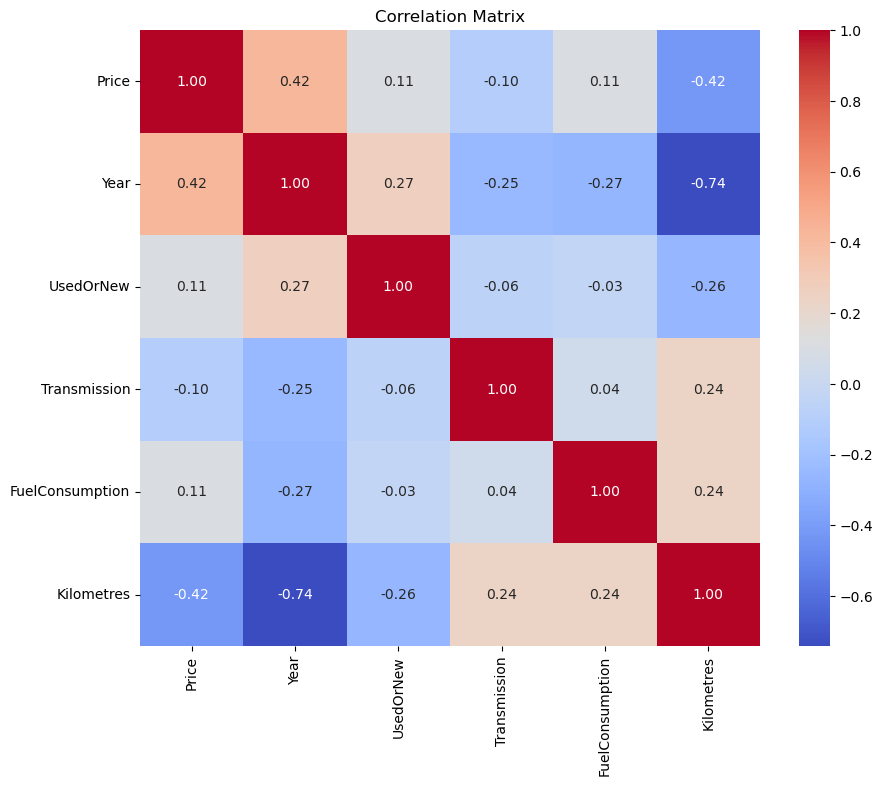

In [452]:
correlation_matrix = model_data[['Price', 'Year', 'UsedOrNew', 'Transmission', 'FuelConsumption','Kilometres']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [453]:
model_data = model_data.drop('Kilometres', axis=1)
categorical_columns = ['Brand']

data_with_dummies = pd.get_dummies(model_data, columns=categorical_columns, drop_first=True)
data_with_dummies.head()

,Year,UsedOrNew,Transmission,FuelConsumption,Price,Brand_Alfa,Brand_Aston,Brand_Audi,Brand_BMW,Brand_BYD,...,Brand_Skoda,Brand_Smart,Brand_Ssangyong,Brand_Subaru,Brand_Suzuki,Brand_Tata,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
1,2022,0,0,6.70,19990,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,0,0,6.60,108988,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,0,0,11.00,32990,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2022,0,0,6.00,34990,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2017,0,0,5.10,62280,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [454]:
X = data_with_dummies.drop('Price', axis=1)
y = data_with_dummies['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Regression

In [456]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [457]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 300505477.32140917
R-squared: 0.47298250313655266


## Linear Regression using Log Transformation

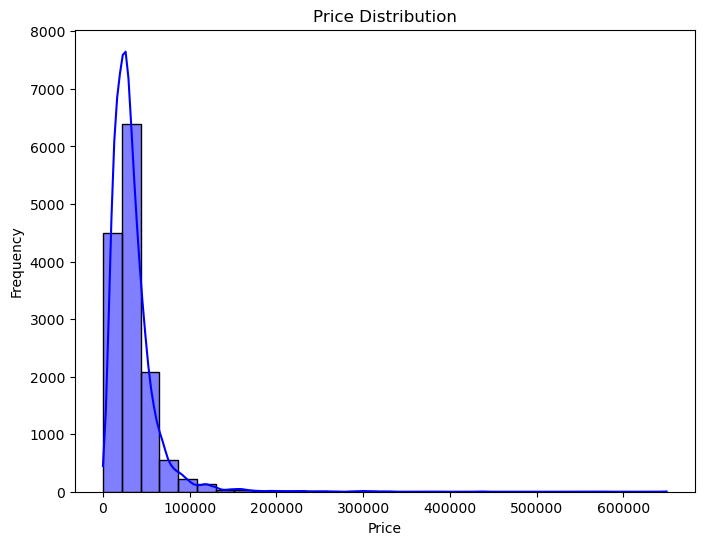

In [459]:
plt.figure(figsize=(8, 6))
sns.histplot(data_with_dummies['Price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [460]:
price_skewness = skew(data_with_dummies['Price'])
print(f'Skewness of Price: {price_skewness}')

Skewness of Price: 5.733787875427285


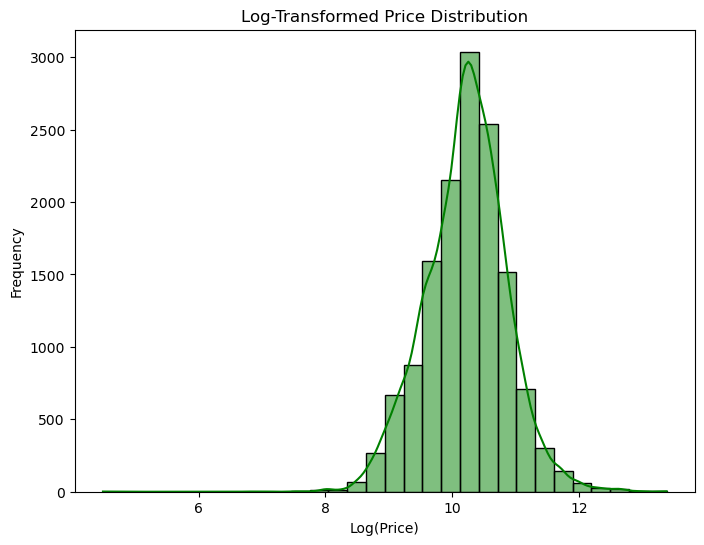

In [461]:
data_with_dummies['Log_Price'] = np.log1p(data_with_dummies['Price'])

plt.figure(figsize=(8, 6))
sns.histplot(data_with_dummies['Log_Price'], kde=True, color='green', bins=30)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [462]:
original_skewness = skew(data_with_dummies['Price'])
log_skewness = skew(data_with_dummies['Log_Price'])

print(f'Original Skewness: {original_skewness}')
print(f'Log-Transformed Skewness: {log_skewness}')

Original Skewness: 5.733787875427285
Log-Transformed Skewness: -0.0719702912323216


In [463]:
X = data_with_dummies.drop(['Price', 'Log_Price'], axis=1)
y = data_with_dummies['Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [464]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [465]:
y_pred_log = reg.predict(X_test)

y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse:.2}')

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared: {r2:.2}')

Mean Squared Error: 2.6e+08
R-squared: 0.54


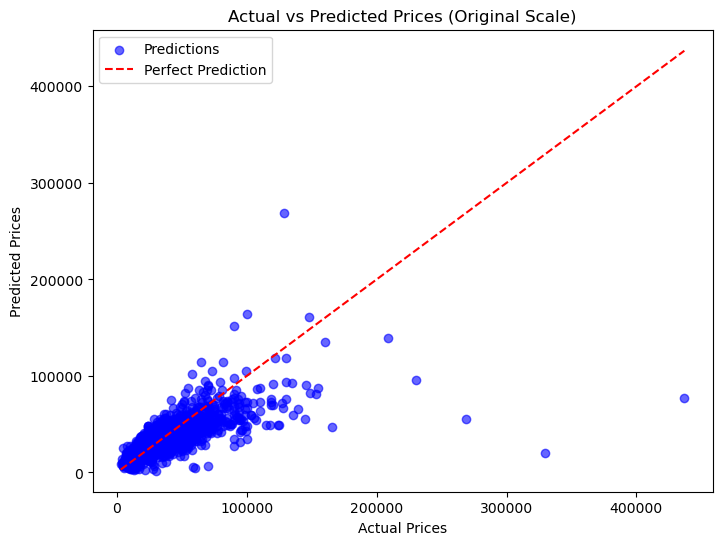

In [466]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices (Original Scale)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [467]:
coefficients = pd.DataFrame({'Feature': X.columns,'Coefficient': reg.coef_}).sort_values(by='Coefficient', ascending=False)

print(coefficients.sort_index())

             Feature  Coefficient
0               Year         0.10
1          UsedOrNew         0.15
2       Transmission         0.04
3    FuelConsumption         0.05
4         Brand_Alfa        -0.48
..               ...          ...
62        Brand_Tata        -0.09
63       Brand_Tesla         1.27
64      Brand_Toyota         0.29
65  Brand_Volkswagen         0.11
66       Brand_Volvo         0.15

[67 rows x 2 columns]


## Random Forest using Log Transformation

In [469]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_predictions_exp = np.exp(rf_predictions)
y_test_exp = np.exp(y_test)

rf_mse_exp = mean_squared_error(y_test_exp, rf_predictions_exp)
print(f'Random Forest - Mean Squared Error: {rf_mse_exp:.2}')

rf_r2_exp = r2_score(y_test_exp, rf_predictions_exp)
print(f'Random Forest - R-squared: {rf_r2_exp:.2}')

Random Forest - Mean Squared Error: 1.6e+08
Random Forest - R-squared: 0.71


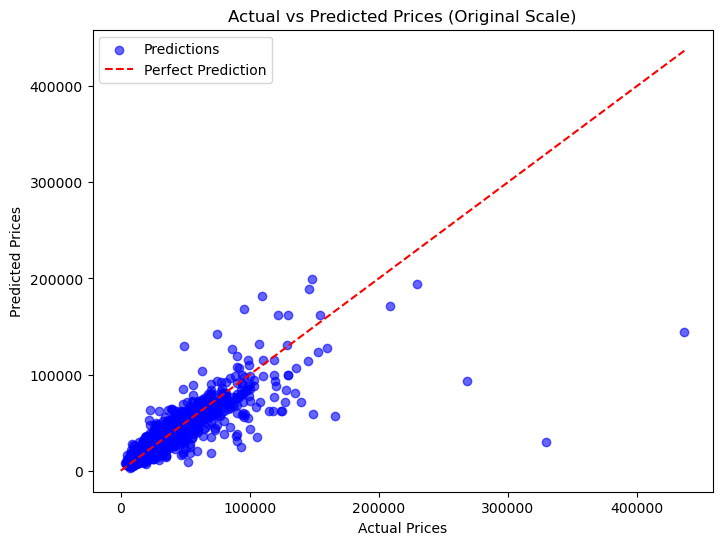

In [470]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp, rf_predictions_exp, color='blue', label='Predictions', alpha=0.6)

plt.plot([0, max(y_test_exp)], [0, max(y_test_exp)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Original Scale)')
plt.legend()

plt.show()